In [1]:
import gym
import numpy as np
import random
import torch
import time
import matplotlib.pyplot as plt

In [2]:
map_5x5 = [
    'SFFFF',
    'FHFHF',
    'HFFHF',
    'HFFFH',
    'FFFFG'
]

In [3]:
env = gym.make('FrozenLake-v0', is_slippery=False, desc = map_5x5)


# visualize 5x5 frozen lake
env.render()


SFFFF
FHFHF
HFFHf
HFFFH
FFFFG


In [4]:
# Total number of States and Actions
n_states = env.observation_space.n
n_actions = env.action_space.n
n_rows = 5
n_cols = 5
print( "States = ", n_states)
print( "Actions = ", n_actions)

States =  25
Actions =  4


In [5]:
import pandas as pd

In [7]:
Q = pd.read_excel( '/content/5x5.xlsx', index_col=0, header=0)
Q

,0,1,2,3
0,0.546367,0.481544,0.590749,0.579091
1,0.630372,0.245025,0.656378,0.315030
2,0.696752,0.729161,0.317190,0.704421
3,0.014811,0.013808,0.014885,0.015170
4,0.000000,0.000000,0.000000,0.000000
5,0.016387,0.014824,0.013485,0.526585
6,0.000000,0.000000,0.000000,0.000000
7,0.187726,0.810205,0.189746,0.740896
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000


In [8]:
# Start with 80% random actions to explore the environment
# exploration decays with each timestep by a factor of 0.999 until it hits 10% exploration rate 

epsilon = 0.80
epsilon_final = 0.1
epsilon_decay = 0.999

gamma = 0.90 # discount factor
learning_rate = 0.9 #how important is the difference between q-val from q-table and what's observed

In [9]:
num_episodes = 1000
steps_total = [] # store number of steps taken in each episode
rewards_total = [] #store reward obtained for each episode
epsilon_total = [] #store epsilon obtained at the end of each episode

In [10]:
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0

    while True:
        
        step += 1
        
        
        ## generating a random num
        random_for_epsilon = np.random.rand()
        
        ## if random num lesser or equal to epsilon, then select random action
        if random_for_epsilon <= epsilon:     
            action = env.action_space.sample() #choose_random_action(state)
        
        ## else update q-vals for given state with infitismly small random nums and select argmax(a) for Q(s,a)
        else: 
           Q.loc[state] += np.random.rand(n_actions,)/1000
           action =  np.argmax(Q.loc[state]) #choose_max_action(state, Q)  #np.argmax(Q.loc[state])    
        
        
        ## as epsilon decays with more timesteps, the prob. of selecting a random val < e decays --> more likely to exploit.     
        if epsilon > epsilon_final:
            epsilon *= epsilon_decay
        
        ## env gives reward and next state and whether we've reached terminal state upon taking a at current state.. 
        new_state, reward, done, info = env.step(action)
        
        ##if you want reward penalized at for each timestep
        ## reward= reward*(0.9**step) 

        # filling the Q Table - 
        Q.loc[state][action] = (1- learning_rate)*Q.loc[state][action] + learning_rate*(reward + gamma * np.max(Q.loc[new_state]))
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            epsilon_total.append(epsilon)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {} Epsilon {}'.format(i_episode,reward, step, epsilon))
            break



Episode: 0 Reward: 0.0 Steps Taken: 5 Epsilon 0.7960079920039992
Episode: 10 Reward: 0.0 Steps Taken: 5 Epsilon 0.7052474157954521
Episode: 20 Reward: 1.0 Steps Taken: 15 Epsilon 0.6323823208350808
Episode: 30 Reward: 0.0 Steps Taken: 6 Epsilon 0.6009240971278791
Episode: 40 Reward: 0.0 Steps Taken: 2 Epsilon 0.5541459530690247
Episode: 50 Reward: 1.0 Steps Taken: 10 Epsilon 0.5182172639986207
Episode: 60 Reward: 1.0 Steps Taken: 14 Epsilon 0.474542201765333
Episode: 70 Reward: 0.0 Steps Taken: 9 Epsilon 0.42936205763132274
Episode: 80 Reward: 1.0 Steps Taken: 13 Epsilon 0.38887229030370796
Episode: 90 Reward: 0.0 Steps Taken: 14 Epsilon 0.3564548051811352
Episode: 100 Reward: 1.0 Steps Taken: 10 Epsilon 0.31994638091242394
Episode: 110 Reward: 0.0 Steps Taken: 7 Epsilon 0.2926884967409928
Episode: 120 Reward: 1.0 Steps Taken: 11 Epsilon 0.2688265467657796
Episode: 130 Reward: 1.0 Steps Taken: 10 Epsilon 0.24056993253144524
Episode: 140 Reward: 1.0 Steps Taken: 10 Epsilon 0.22095704114

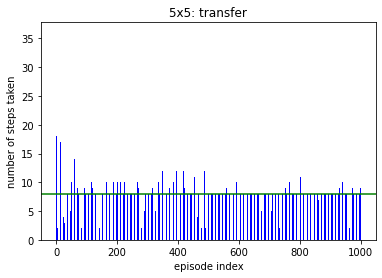

In [14]:
plt.axhline(y=8, color='green', linestyle='-')
plt.bar(np.arange(0, 1000), steps_total, 
        width = 0.4, color = 'blue')
plt.xlabel('episode index')
plt.ylabel('number of steps taken')
plt.title('5x5: transfer')
plt.show()

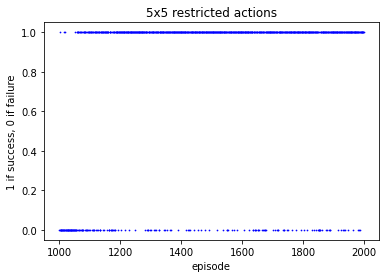

In [15]:
plt.scatter(np.arange(1000, 2000), rewards_total[0:1000], s = 0.5, color = 'blue')
plt.title('5x5 restricted actions')
plt.xlabel('episode')
plt.ylabel('1 if success, 0 if failure')
plt.show()